# Data Visualization: CORGIS Dataset Project: Food Python
#### Vel (Tien-Yun) Wu
Master of Science in Information Management, University of Illinois at Urbana-Champaign

## Contents

### For the convenience of all sides, I have opted to put all parts in one file. Clicking either of the links below takes the reader to a specific Part.

<a href = "#pt1"> Part 1: Data Exploration (04/12, 2020)(05/17, 2020)</a>
<br>
<a href = "#pt2"> Part 2: Interactive Dashboard (04/19, 2020)(05/17, 2020)</a>
<br>
<a href = "#pt3"> Part 3: Central Viz: Word Cloud (04/23, 2020)</a>

## Data Description

The name of this dataset is simply **"food.data"**, created and maintained by Ryan Whitcomb since 06/21/2016.


Despite its simple-sounding name, it originates from the Food Composition Database owned by Department of Agriculture in the United States of America. Within lies the data of all kinds of food with elaborate Python dictionaries that details the various kinds of nutrients contained by each food type. Vitamins, minerals and macronutrient percentages, to name a few.

For anyone looking to obtain the dataset, its very origin can be found at: https://ndb.nal.usda.gov/
But for myself, I was able to obtain it here: https://think.cs.vt.edu/corgis/python/food/

* Update 04/18/2020:The origin has changed its URL and is now instead accessible at:https://fdc.nal.usda.gov/


* Update 04/24/2020:It has been discovered that MyBinder does not support nltk stopwords by default. The code blocks related to stopwords have therefore been removed from this version.

* **Update 05/17/2020**: In response to peer feedbackL 
    - **Plot 1: Distribution using line plot** of **Part 1** has been enhanced. It is now a widget which plots randomly sampled data. The X-axis ticks have also be rotated. This improves readability and reusability of the visualization.
    - All histograms have been checked and assigned appropriate x-labels and y-labels.
    - Added .head() to some dataframe printing functions, though I am uncertain about whether this is superior to simply showing the head and tails.


Supposedly, as it is part of the CORGIS Datasets Project on https://corgis-edu.github.io/corgis/, browsers like ourselves may perform analytics but not changing the original dataset and re-publishing it. The file is 10.5 MB (11,058,835 bytes) in size. A size like this is not insignificant, so one cannot just open it and expect to extract useful information in comprehensible format. Therefore, Python libraries will be required to inspect and analyze it.


In its original form, the dataset has 4 columns:
* `Category`: Denotes food type. Naturally, this is categorical, and so we may utilize this for data grouping later on.
    - Type: String
    - Example: "BUTTER", "MACKEREL", "SCALLOP", etc.
* `Description`: This is a string that is comprised of entirely-uppercase phrases that describe the food. For 
    - Type: String with commas
    - Example: "BUTTER,WITH SALT", "FROG LEGS,RAW", "SCALLOP,(BAY&SEA),CKD,STMD	", etc.
* `Nutrient Data Bank Number`: A integer that conforms to standards put forth by U.S. Department of Agriculture (USDA).
    - Type: Integer
    - Example: "1005", "90240", etc.
* `Data`: The amount of each nutrient type listed as values and keys in a Python dictionary (also JSON format. In this particular case, they may be considered the same)
    - Type: JSON or Python Dictionary equivilant
    - Example: "{'Alpha Carotene': 0, 'Ash': 2.11, 'Beta Carotene' : 0.11, etc...}"


Because the JSON structure in the last column contains more than 40 nutrient types (this number is known after performing the JSON normalization below), the 'Data' column will have to be parsed as multiple columns to be sensible.

In the following sections, brief markdowns will be provided as the writer of this notebook traverses through the dataset programmatically.

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "fantasy"
import numpy as np
import bqplot
import traitlets
import ipywidgets
import plotly.express as px
import scipy
import scipy.misc
import scipy.cluster
import food
from pandas.io.json import json_normalize

# New imports for Part 3
import nltk
from nltk.corpus import stopwords, words
import string
import itertools
from wordcloud import WordCloud
import operator

# Part 1: Data Exploration <a id = "pt1"> </a>

### First, to import the libraries needed, as exhaustively as possible

### Next, converts the data directly into a pandas Dataframe

Of course, this is after the data is read using the "get_report()" method provided in the documentation

In [2]:
report = food.get_report()

In [3]:
dfObj = pd.DataFrame(report)
print("There are", len(dfObj), "data in total")
# Because there are many data, we display only some samples of it using .head(). 
# This way, we know what they look like at the very least
dfObj.head(13)

There are 7413 data in total


,Category,Description,Nutrient Data Bank Number,Data
0,BUTTER,"BUTTER,WITH SALT",1001,"{'Alpha Carotene': 0, 'Ash': 2.11, 'Beta Carot..."
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,"{'Alpha Carotene': 0, 'Ash': 2.11, 'Beta Carot..."
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,"{'Alpha Carotene': 0, 'Ash': 0.0, 'Beta Carote..."
3,CHEESE,"CHEESE,BLUE",1004,"{'Alpha Carotene': 0, 'Ash': 5.11, 'Beta Carot..."
4,CHEESE,"CHEESE,BRICK",1005,"{'Alpha Carotene': 0, 'Ash': 3.18, 'Beta Carot..."
5,CHEESE,"CHEESE,BRIE",1006,"{'Alpha Carotene': 0, 'Ash': 2.7, 'Beta Carote..."
6,CHEESE,"CHEESE,CAMEMBERT",1007,"{'Alpha Carotene': 0, 'Ash': 3.68, 'Beta Carot..."
7,CHEESE,"CHEESE,CARAWAY",1008,"{'Alpha Carotene': 0, 'Ash': 3.28, 'Beta Carot..."
8,CHEESE,"CHEESE,CHEDDAR",1009,"{'Alpha Carotene': 0, 'Ash': 3.93, 'Beta Carot..."
9,CHEESE,"CHEESE,CHESHIRE",1010,"{'Alpha Carotene': 0, 'Ash': 3.6, 'Beta Carote..."


In [4]:
# The "Data" column uses JSON format. That is clever but does not have much readability. We therefore normalize it as follow.
dfObj2 = json_normalize(dfObj['Data'])
print("There are", len(dfObj2), "data in total")
dfObj2.head(13)

There are 7413 data in total


,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Kilocalories,Lutein and Zeaxanthin,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,0,2.11,158,0,0.06,215,19,0.0,717,0,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,0,2.11,158,0,0.06,219,19,0.0,717,0,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,0,0.00,193,0,0.00,256,22,0.0,876,0,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,0,5.11,74,0,2.34,75,15,0.0,353,0,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,0,3.18,76,0,2.79,94,15,0.0,371,0,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
5,0,2.70,9,0,0.45,100,15,0.0,334,0,...,152,629,2.38,592,174,1.65,0.235,0.0,0.24,2.3
6,0,3.68,12,0,0.46,72,15,0.0,300,0,...,187,842,2.38,820,241,1.30,0.227,0.0,0.21,2.0
7,0,3.28,0,0,3.06,93,0,0.0,376,0,...,93,690,2.94,1054,271,0.27,0.074,0.0,0.00,0.0
8,0,3.93,85,0,1.28,105,16,0.0,403,0,...,98,621,3.11,1002,265,0.83,0.074,0.0,0.29,2.8
9,0,3.60,0,0,4.78,103,0,0.0,387,0,...,95,700,2.79,985,233,0.83,0.074,0.0,0.00,0.0


In [5]:
foodData_good_to_go = dfObj.merge(dfObj2, left_index=True, right_index = True)
foodData_good_to_go = foodData_good_to_go.drop(['Data', 'Nutrient Data Bank Number'], axis=1)
foodData_good_to_go

,Category,Description,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",0,2.11,158,0,0.06,215,19,0.0,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",0,2.11,158,0,0.06,219,19,0.0,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",0,0.00,193,0,0.00,256,22,0.0,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",0,5.11,74,0,2.34,75,15,0.0,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",0,3.18,76,0,2.79,94,15,0.0,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,FROG LEGS,"FROG LEGS,RAW",0,1.40,0,0,0.00,50,65,0.0,...,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1
7409,MACKEREL,"MACKEREL,SALTED",0,13.40,0,0,0.00,95,95,0.0,...,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8
7410,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",0,3.06,0,0,0.00,53,81,0.0,...,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2
7411,SNAIL,"SNAIL,RAW",0,1.30,0,0,2.00,50,65,0.0,...,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1


### With the dataframe working as an average analyst expects it to, let the visual exploraton commence:

In [6]:
foodData_by_category = foodData_good_to_go.groupby(['Category']).sum().reset_index()
foodData_by_category

,Category,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Kilocalories,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,ABALONE,0,3.34,0,0,17.06,179,65,0.0,294,...,534,892,1.77,12,4,1.42,0.300,3.8,4.00,23.0
1,ABIYUCH,0,0.90,60,0,17.60,0,0,5.3,69,...,304,20,0.31,100,5,0.00,0.000,54.1,0.00,0.0
2,ACEROLA,0,0.20,0,0,7.69,0,0,1.1,32,...,146,7,0.10,767,38,0.00,0.009,1677.6,0.00,0.0
3,ACEROLA JUICE,0,0.20,305,0,4.80,0,0,0.3,23,...,97,3,0.10,509,25,0.00,0.004,1600.0,0.18,1.4
4,ACORN FLOUR,0,1.69,0,0,54.65,0,0,0.0,501,...,712,0,0.64,51,3,0.00,0.688,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,YARDLONG BEAN,0,2.06,0,0,26.70,0,0,0.0,141,...,820,248,1.09,1765,89,0.00,0.072,51.2,0.00,0.0
1179,YARDLONG BNS,0,6.77,0,0,104.09,0,0,18.6,583,...,1787,263,5.66,68,4,0.00,0.561,2.4,0.00,0.0
1180,YAUTIA (TANNIER),0,1.45,5,0,23.63,0,0,1.5,98,...,598,21,0.50,8,0,0.00,0.237,5.2,0.00,0.0
1181,YELLOWTAIL,0,2.49,0,0,0.00,126,0,0.0,333,...,958,89,1.19,199,60,2.55,0.345,5.7,0.00,0.1


In [7]:
print("All columns in the current dataset are:")

for each_column in foodData_by_category.columns: 
    print(each_column)

All columns in the current dataset are:
Category
Alpha Carotene
Ash
Beta Carotene
Beta Cryptoxanthin
Carbohydrate
Cholesterol
Choline
Fiber
Kilocalories
Lutein and Zeaxanthin
Lycopene
Manganese
Niacin
Pantothenic Acid
Protein
Refuse Percentage
Retinol
Riboflavin
Selenium
Sugar Total
Thiamin
Water
Fat.Monosaturated Fat
Fat.Polysaturated Fat
Fat.Saturated Fat
Fat.Total Lipid
Household Weights.1st Household Weight
Household Weights.2nd Household Weight
Major Minerals.Calcium
Major Minerals.Copper
Major Minerals.Iron
Major Minerals.Magnesium
Major Minerals.Phosphorus
Major Minerals.Potassium
Major Minerals.Sodium
Major Minerals.Zinc
Vitamins.Vitamin A - IU
Vitamins.Vitamin A - RAE
Vitamins.Vitamin B12
Vitamins.Vitamin B6
Vitamins.Vitamin C
Vitamins.Vitamin E
Vitamins.Vitamin K


Now that we have total values of nutrients of each food type, we can narrow the scope down to the 7 major nutrients:

* Carbohydrates: Column `'Carbohydrate'`
* Proteins: Column `'Protein'`
* Fats: Column `'Fat.Total Lipid'`
* Vitamins: Column `'Vitamins.Vitamin C'`
* Minerals: Column `'Major Minerals.Calcium'`
* Fibre / Fiber: Column `'Fiber'`
* Water: Column `'Water'`

The decision to represent Vitamins with Vitamin C and Minerals with Calcium is temporary. Better methods will be put in place when they become available in the foreseable future.

# Plot 1: Distribution using line plot

These are plotted to show the distribution of the 7 selected nutrients across all food types:

In [8]:
plt.clf()
random_samples = ipywidgets.Checkbox(True, description='Plot Only Samples')
num_sample = ipywidgets.IntSlider(min= 7,max=1183,step=1,value=70, description='How many samples')

@ipywidgets.interact(rdm_spl = random_samples, num_spl = num_sample)
def line_plot_with_samples(rdm_spl = True, num_spl = 70):
    if rdm_spl:
        foodData_to_plot_1 = foodData_by_category.sample(n=num_spl)
    else:
        foodData_to_plot_1 = foodData_by_category
       
    plt.figure(figsize=(24,13))
    plt.plot( 'Category', 'Carbohydrate', data=foodData_to_plot_1, marker='*', color='#4832a8', linewidth=1)
    plt.plot( 'Category', 'Protein', data=foodData_to_plot_1, marker='*', markersize=2, color='#3dff47', linewidth=1)
    plt.plot( 'Category', 'Fat.Total Lipid', data=foodData_to_plot_1, marker='*', markersize=2, color='olive', linewidth=1)
    plt.plot( 'Category', 'Vitamins.Vitamin C', data=foodData_to_plot_1, marker='p', markersize=2, color='skyblue', linewidth=1)
    plt.plot( 'Category', 'Major Minerals.Calcium', data=foodData_to_plot_1, marker='p', markersize=2, color='#32a2a8', linewidth=1)
    plt.plot( 'Category', 'Fiber', data=foodData_to_plot_1, marker='p', markersize=2, color='#a83232', linewidth=1)
    plt.plot( 'Category', 'Water', data=foodData_to_plot_1, marker='p', markersize=2, color='#ffbb3d', linewidth=1)

    plt.legend()
    plt.xlabel('Food Type', fontsize = 'xx-large')
    plt.xticks(rotation=90)
    plt.ylabel('Amount of Nutrients', fontsize = 'xx-large')

<Figure size 432x288 with 0 Axes>

interactive(children=(Checkbox(value=True, description='Plot Only Samples'), IntSlider(value=70, description='…

Suffice to say, this is not exactly helpful because there are a total of 1183 types of food. Though some foods do stand out as having particularly high values of Water, Calcium and Fat Total Lipid.
**As a result, this plot cannot quite be considered successful. Another attempt is necessay.**

# Plot 2: Distribution using Histogram

By switching to using Histogram, the distribution of nutrients across food types can be more meaningfully shown:

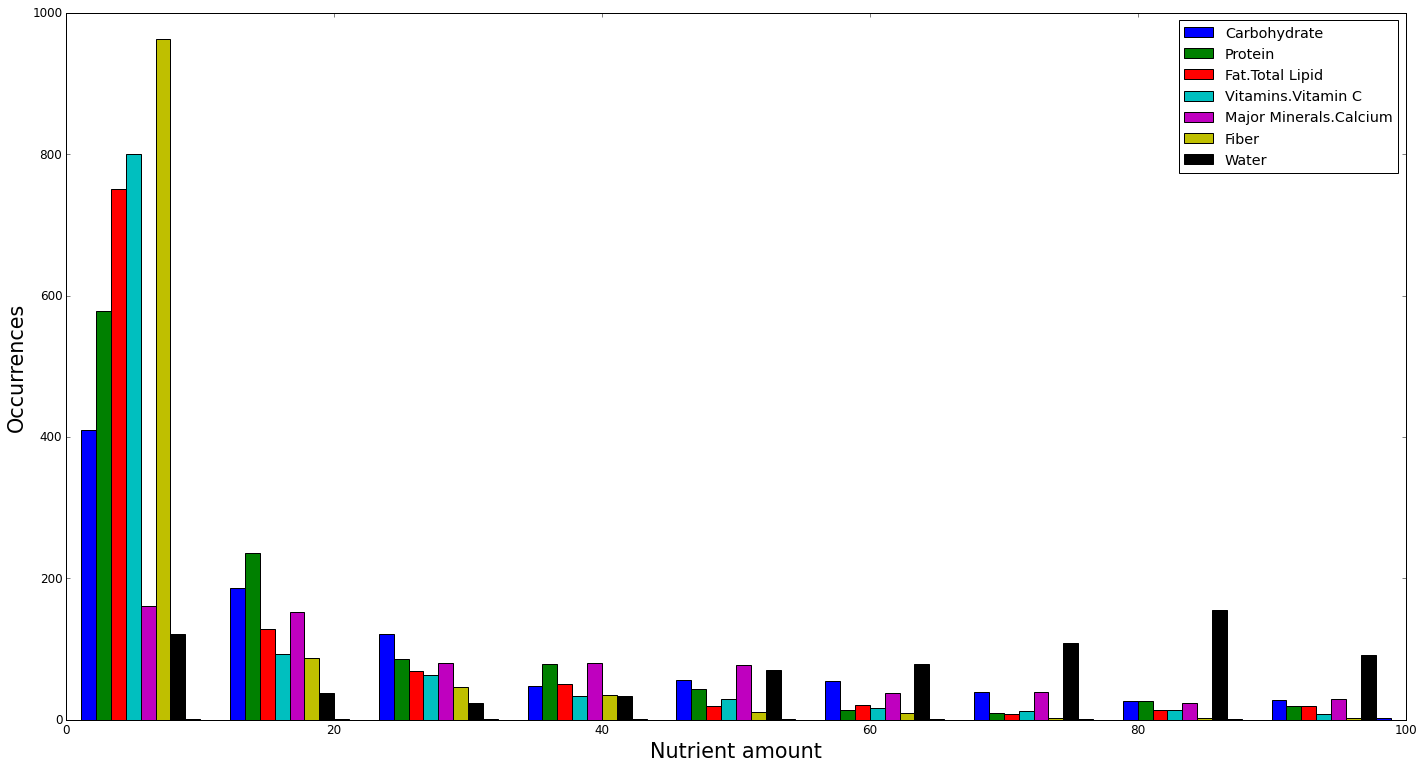

In [9]:
plt.figure(figsize=(24,13))
plt.style.use('classic')

carbon = foodData_by_category['Carbohydrate']
protein = foodData_by_category['Protein']
fatTotalLipid = foodData_by_category['Fat.Total Lipid']
vitaminC = foodData_by_category['Vitamins.Vitamin C']
mineralCalcium = foodData_by_category['Major Minerals.Calcium']
fiber = foodData_by_category['Fiber']
water = foodData_by_category['Water']
bins = np.linspace(0, 100, 10)

plt.hist([carbon, protein, fatTotalLipid, vitaminC, mineralCalcium, fiber, water, bins], bins, 
         label=['Carbohydrate', 
                'Protein', 
                'Fat.Total Lipid', 
                'Vitamins.Vitamin C', 
                'Major Minerals.Calcium', 
                'Fiber',
                'Water'])
plt.legend(loc='upper right')
plt.xlabel("Nutrient amount", fontsize = "xx-large")
plt.ylabel("Occurrences", fontsize = "xx-large")
plt.show()

# Part 2: Interactive Dashboard<a id="pt2"></a>

### Because of the instructions' stating to preserve code blocks instead of deleting them, several cells below might appear messy and inconsistent. Regardless, they are all part of the thinking process leading up to the Dashboard's creation.

In [10]:
# Explore how many categories are there

food_category = []
for each in  foodData_good_to_go['Category'].unique():
    food_category.append(each)
food_category.sort()


print(len(food_category))
print(food_category)

# Because there are over 1,000 categories in total, it would be unrealistic to plot on a grid heat map. 
# Another approach is necessary

1183
['ABALONE', 'ABIYUCH', 'ACEROLA', 'ACEROLA JUICE', 'ACORN FLOUR', 'ACORNS', 'AGAVE', 'AGUTUK', 'ALCOHOLIC BEV', 'ALFALFA SEEDS', 'ALLSPICE', 'ALMOND BUTTER', 'ALMONDS', 'AMARANTH', 'AMARANTH GRAIN', 'AMARANTH LEAVES', 'ANCHOVY', 'ANIMAL FAT', 'APPLE CIDER-FLAVORED DRK', 'APPLE JUC', 'APPLES', 'APPLESAUCE', 'APRICOT NECTAR', 'APRICOTS', 'ARCHWAY HOME STYLE COOKIES', 'ARCHWAY Home Style Cookies', 'ARROWHEAD', 'ARROWROOT', 'ARTICHOKES', 'ARTIFICIAL BLUEBERRY MUFFIN MIX', 'ARUGULA', 'ASPARAGUS', 'AVOCADOS', 'BABYFOOD', 'BACON', 'BACON BITS', 'BAGEL', 'BAGELS', 'BAKED BNS', 'BAKING CHOC', 'BALSAM-PEAR (BITTER GOURD)', 'BAMBOO SHOOTS', 'BANANAS', 'BANQUET CHICK POT PIE', 'BANQUET GRY & SALURY STK W/ MSHD POT & CORN IN SEASONSAU', 'BANQUET HEARTY ONE STK DIN', 'BANQUET ORIG FRIED CHK THIGH', 'BANQUET SLCED BF W/GRY', 'BANQUET TKY & GRY W/DRESS ', 'BARBECUE LOAF', 'BARLEY', 'BASIL', 'BASS', 'BEANS', 'BEAR', 'BEECHNUTS', 'BEEF', 'BEEF BROTH&TOMATO JUC', 'BEEF JERKY', 'BEEF POT PIE', 'BEEF 

In [11]:
#all_cat_values_sorted = sorted(list(foodData_good_to_go['Category'].unique())).insert(0,'N/A')
#all_cat_values_sorted
#all_cat_values_sorted

In [12]:
# Making Part 1's successful viz a function so it can be used repeatedly
def show_7_essential_nutriet_dist(fd_subset):
    plt.figure(figsize=(24,13))
    plt.style.use('classic')

    essential_nutrients = ['Carbohydrate', 
                           'Protein', 
                           'Fat.Total Lipid', 
                           'Vitamins.Vitamin C', 
                           'Major Minerals.Calcium', 
                           'Fiber',
                           'Water']
    
    carbon = fd_subset['Carbohydrate']
    protein = fd_subset['Protein']
    fatTotalLipid = fd_subset['Fat.Total Lipid']
    vitaminC = fd_subset['Vitamins.Vitamin C']
    mineralCalcium = fd_subset['Major Minerals.Calcium']
    fiber = fd_subset['Fiber']
    water = fd_subset['Water']
    bins = np.linspace(0, 100, 10)

    plt.hist([carbon, protein, fatTotalLipid, vitaminC, mineralCalcium, fiber, water, bins], bins, 
             label=essential_nutrients)
    plt.legend(loc='upper right')
    plt.show()

In [13]:
# Test the function with the main dataset
# show_7_essential_nutriet_dist(foodData_good_to_go)

### How to use these Dashboards

#### (1) Choose which nutrients to compare ('x', 'y', 'z' and 'zz')

#### (2) (Optional) Choose a particular type of food to look at with "Food Type"

#### (3) (if taking Step 2) Tick the "Subset by Category" checkbox for your choices to take effects

## Dashboard: Version 1
Code referenced from class materials and also from: https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

In [14]:
plt.clf()
irrelevant_options = ['Category', 'Description']
textbox = ipywidgets.Dropdown(
    description='Food Type:   ',
    value='APPLES',
    options=sorted(foodData_good_to_go['Category'].unique().tolist())
)
subsetting_or_not = ipywidgets.Checkbox(False, description='Subset by Category')
x_axis_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
y_axis_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
z_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
bin_count_slider = ipywidgets.IntSlider(min= 5,max=100,step=5,value=10, description='Histogram Bins')

@ipywidgets.interact(x = x_axis_options, y= y_axis_options, z = z_options, 
                     bin_count = bin_count_slider, txt = textbox, sst = subsetting_or_not,
                     colormap = plt.colormaps(),sym_log = True)
def plot(x = 'Carbohydrate',y = 'Fiber', z = 'Protein', colormap = 'hsv', bin_count = 10, txt = "APPLES", sst = False):
    
    if sst:
        dataset_selected = foodData_good_to_go.loc[foodData_good_to_go['Category'] == txt]
    else: 
        dataset_selected = foodData_good_to_go
    
    fig, axs = plt.subplots(1,2,figsize=(16, 9))
    left_plot = axs[0].scatter(dataset_selected[x],dataset_selected[y], cmap=colormap, c=dataset_selected[z])
    bins = np.linspace(0, 100, 10)
    right_plot = plt.hist([dataset_selected[x], dataset_selected[y], dataset_selected[z]], bins = bin_count, label=[x, y, z])  
    axs[0].set(xlabel=x, ylabel=y)
    axs[0].title.set_text('Scatter Plot: Compare 3 Nutrients')
    axs[1].title.set_text('Histogram: Compare 3 Nutrients')
    axs[1].set(xlabel="Nutrient amount", ylabel="Occurrences")
    plt.legend(loc='upper right')
    plt.colorbar(left_plot, cax = fig.add_axes([0, 0.1, 0.03, 0.8]) )
    plt.show()

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='x', index=4, options=('Alpha Carotene', 'Ash', 'Beta Carotene', 'B…

## Dashboard: Version 2
#### The Scatter Plot portion is transformed into a 3D form
#### This is a technique I recently learned from Akhil Sreehari, my mentor in the iSchool Mentorship Program

In [15]:
plt.clf()
irrelevant_options = ['Category', 'Description']
textbox = ipywidgets.Dropdown(
    description='Food Type:   ',
    value='APPLES',
    options=sorted(foodData_good_to_go['Category'].unique().tolist())
)
subsetting_or_not = ipywidgets.Checkbox(False, description='Subset by Category')
x_axis_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
y_axis_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
z_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
zz_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
bin_count_slider = ipywidgets.IntSlider(min= 5,max=100,step=5,value=10, description='Histogram Bins')

@ipywidgets.interact(x = x_axis_options, y= y_axis_options, z = z_options, zz = zz_options,
                     bin_count = bin_count_slider, txt = textbox, sst = subsetting_or_not,
                     colormap = plt.colormaps(),sym_log = True)
def plot(x = 'Carbohydrate',y = 'Fiber', z = 'Protein', zz = 'Water', colormap = 'hsv', bin_count = 10, txt = "APPLES", sst = False):
    
    if sst:
        dataset_selected = foodData_good_to_go.loc[foodData_good_to_go['Category'] == txt]
    else: 
        dataset_selected = foodData_good_to_go
    
    fig = px.scatter_3d(dataset_selected, x=x, y=y, z=z,
              color=zz)
    fig.show()
    fig, axs = plt.subplots(figsize=(16, 9))
    right_plot = plt.hist([dataset_selected[x], dataset_selected[y], dataset_selected[z], dataset_selected[zz]], bins = bin_count, label=[x, y, z, zz])  
    axs.title.set_text('Histogram: Compare 4 Nutrients')
    plt.legend(loc='upper right')
    plt.xlabel("Nutrient amount", fontsize = "xx-large")
    plt.ylabel("Occurrences", fontsize = "xx-large")
    plt.show()

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='x', index=4, options=('Alpha Carotene', 'Ash', 'Beta Carotene', 'B…

I wanted to completely ditch version 1 and stick with version 2, but could not find a workaround to get plotly's 3D Scatter Plot to align horizontally with matplotlib's histogram.

# Part 3:  Interactive Data Visualization Article<a id="pt3"></a>

Other Dataset: Supporting Data April 2020 from:
https://fdc.nal.usda.gov/download-datasets.html

### 3.1 Central visualization: Preparing the data.

##### This backbone of this visualization is mostly based on 'inClass_week09_part1.ipynb' supplied by: https://uiuc-ischool-dataviz.github.io/spring2020/week09/

In [16]:
foodData_good_to_go

,Category,Description,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",0,2.11,158,0,0.06,215,19,0.0,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",0,2.11,158,0,0.06,219,19,0.0,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",0,0.00,193,0,0.00,256,22,0.0,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",0,5.11,74,0,2.34,75,15,0.0,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",0,3.18,76,0,2.79,94,15,0.0,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,FROG LEGS,"FROG LEGS,RAW",0,1.40,0,0,0.00,50,65,0.0,...,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1
7409,MACKEREL,"MACKEREL,SALTED",0,13.40,0,0,0.00,95,95,0.0,...,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8
7410,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",0,3.06,0,0,0.00,53,81,0.0,...,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2
7411,SNAIL,"SNAIL,RAW",0,1.30,0,0,2.00,50,65,0.0,...,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1


In [17]:
## The idea of creating a new column for word cloud was tested for a bit, but eventually deemed unnecessary
#foodData_good_to_go["Description_Parsed"] = foodData_good_to_go["Description"].str.replace(","," ")
#foodData_good_to_go

In [18]:
word_cloud_origin = foodData_good_to_go["Description"].str.replace(","," ").str.cat().split()
word_cloud_origin

['BUTTER',
 'WITH',
 'SALTBUTTER',
 'WHIPPED',
 'WITH',
 'SALTBUTTER',
 'OIL',
 'ANHYDROUSCHEESE',
 'BLUECHEESE',
 'BRICKCHEESE',
 'BRIECHEESE',
 'CAMEMBERTCHEESE',
 'CARAWAYCHEESE',
 'CHEDDARCHEESE',
 'CHESHIRECHEESE',
 'COLBYCHEESE',
 'COTTAGE',
 'CRMD',
 'LRG',
 'OR',
 'SML',
 'CURDCHEESE',
 'COTTAGE',
 'CRMD',
 'W/FRUITCHEESE',
 'COTTAGE',
 'NONFAT',
 'UNCRMD',
 'DRY',
 'LRG',
 'OR',
 'SML',
 'CURDCHEESE',
 'COTTAGE',
 'LOWFAT',
 '2%',
 'MILKFATCHEESE',
 'COTTAGE',
 'LOWFAT',
 '1%',
 'MILKFATCHEESE',
 'CREAMCHEESE',
 'EDAMCHEESE',
 'FETACHEESE',
 'FONTINACHEESE',
 'GJETOSTCHEESE',
 'GOUDACHEESE',
 'GRUYERECHEESE',
 'LIMBURGERCHEESE',
 'MONTEREYCHEESE',
 'MOZZARELLA',
 'WHL',
 'MILKCHEESE',
 'MOZZARELLA',
 'WHL',
 'MILK',
 'LO',
 'MOISTCHEESE',
 'MOZZARELLA',
 'PART',
 'SKIM',
 'MILKCHEESE',
 'MOZZARELLA',
 'PART',
 'SKIM',
 'MILK',
 'LO',
 'MOISTCHEESE',
 'MUENSTERCHEESE',
 'NEUFCHATELCHEESE',
 'PARMESAN',
 'GRATEDCHEESE',
 'PARMESAN',
 'HARDCHEESE',
 'PORT',
 'DE',
 'SALUTCHEESE',

In [19]:
word_cloud_base = {}
for each_word in word_cloud_origin:
    if each_word in word_cloud_base: 
        word_cloud_base[each_word] += 1 
    else:
        word_cloud_base[each_word] = 1
word_cloud_base = sorted(word_cloud_base.items(), key=operator.itemgetter(1))
word_cloud_base = dict(word_cloud_base[::-1])
word_cloud_base

{'CKD': 1340,
 'W/': 615,
 'LN': 566,
 '&': 560,
 'FAT': 467,
 'CND': 462,
 'MEAT': 381,
 'LN&FAT': 380,
 'FRZ': 364,
 'BLD': 347,
 'PREP': 320,
 'DRND': 304,
 'RTE': 298,
 'DRY': 288,
 'OR': 260,
 'FRSH': 248,
 'RND': 238,
 'SOUP': 232,
 'LOIN': 227,
 'ALL': 224,
 'CHICK': 224,
 '1/8"FAT': 221,
 'CHOIC': 221,
 'RED': 212,
 'WHITE': 211,
 'SEEDS': 183,
 'WHL': 178,
 'MIX': 171,
 'SEL': 160,
 'CHOC': 158,
 'VEG': 158,
 'BF': 140,
 'OF': 140,
 'MATURE': 139,
 'FOODS': 137,
 'RAWBEEF': 136,
 'REG': 134,
 'ONLY': 133,
 'GRDS': 130,
 'HAM': 128,
 'QUAKER': 127,
 '0"': 126,
 'CURED': 125,
 'BRLDBEEF': 124,
 'MEAT&SKN': 122,
 'SHLDR': 119,
 'JUC': 117,
 'TOP': 116,
 'COMPANY': 113,
 'FRYERS': 112,
 'BROILERS': 112,
 'RIB': 109,
 'INST': 108,
 'H2O': 104,
 'VAR': 102,
 '(ALASKA': 99,
 'FROM': 99,
 'LT': 98,
 'LEG': 96,
 'BEV': 96,
 'RAW': 95,
 'CRM': 94,
 'DOM': 93,
 'DRSNG': 93,
 'BNLESS': 92,
 'LO': 91,
 'FRUIT': 89,
 'IMP': 88,
 'MEATS&BY-PRODUCTS': 88,
 'RAWLAMB': 86,
 'BONE-IN': 86,
 '0"F

In [20]:
# Planning to visualize the 30 most frequent words in the dataset
n = 30
word_cloud_plot = {k: word_cloud_base[k] for k in list(word_cloud_base)[:n]} 
word_cloud_plot

{'CKD': 1340,
 'W/': 615,
 'LN': 566,
 '&': 560,
 'FAT': 467,
 'CND': 462,
 'MEAT': 381,
 'LN&FAT': 380,
 'FRZ': 364,
 'BLD': 347,
 'PREP': 320,
 'DRND': 304,
 'RTE': 298,
 'DRY': 288,
 'OR': 260,
 'FRSH': 248,
 'RND': 238,
 'SOUP': 232,
 'LOIN': 227,
 'ALL': 224,
 'CHICK': 224,
 '1/8"FAT': 221,
 'CHOIC': 221,
 'RED': 212,
 'WHITE': 211,
 'SEEDS': 183,
 'WHL': 178,
 'MIX': 171,
 'SEL': 160,
 'CHOC': 158}

In [21]:
# 04/24: Because MyBinder does not work with stopwords, this feature was taken out.
"""
stop_words = set(stopwords.words('english'))
word_cloud_base_less_words = {}
for w, num in word_cloud_base.items():
    if w.lower() not in stop_words:
        word_cloud_base_less_words[w] = num
word_cloud_base_less_words

word_cloud_base_no_punc_words = {}
for word, value in word_cloud_base_less_words.items():
    if word[-1] in string.punctuation: 
        word = word[:-1] 
    if len(word) > 0: 
        if word in word_cloud_base_no_punc_words: 
            word_cloud_base_no_punc_words[word] += value 
        else: 
            word_cloud_base_no_punc_words[word] = value
word_cloud_base_no_punc_sorted = sorted(word_cloud_base_no_punc_words.items(), key=operator.itemgetter(1)) 
word_cloud_base_no_punc_sorted = dict(word_cloud_base_no_punc_sorted[::-1])
word_cloud_base_no_punc_sorted

"""

"\nstop_words = set(stopwords.words('english'))\nword_cloud_base_less_words = {}\nfor w, num in word_cloud_base.items():\n    if w.lower() not in stop_words:\n        word_cloud_base_less_words[w] = num\nword_cloud_base_less_words\n\nword_cloud_base_no_punc_words = {}\nfor word, value in word_cloud_base_less_words.items():\n    if word[-1] in string.punctuation: \n        word = word[:-1] \n    if len(word) > 0: \n        if word in word_cloud_base_no_punc_words: \n            word_cloud_base_no_punc_words[word] += value \n        else: \n            word_cloud_base_no_punc_words[word] = value\nword_cloud_base_no_punc_sorted = sorted(word_cloud_base_no_punc_words.items(), key=operator.itemgetter(1)) \nword_cloud_base_no_punc_sorted = dict(word_cloud_base_no_punc_sorted[::-1])\nword_cloud_base_no_punc_sorted\n\n"

In [22]:
# Testing a subsetting action
foodData_good_to_go_subset_for_word_cloud = foodData_good_to_go[foodData_good_to_go['Major Minerals.Sodium'] > 500]
foodData_good_to_go_subset_for_word_cloud

,Category,Description,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",0,2.11,158,0,0.06,215,19,0.0,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",0,2.11,158,0,0.06,219,19,0.0,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
3,CHEESE,"CHEESE,BLUE",0,5.11,74,0,2.34,75,15,0.0,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",0,3.18,76,0,2.79,94,15,0.0,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
5,CHEESE,"CHEESE,BRIE",0,2.70,9,0,0.45,100,15,0.0,...,152,629,2.38,592,174,1.65,0.235,0.0,0.24,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,PUDDINGS,"PUDDINGS,CHOC FLAVOR,LO CAL,REG,DRY MIX",0,5.70,0,0,74.42,0,3,10.1,...,570,3326,1.49,0,0,0.00,0.027,0.0,0.02,0.5
7404,PUDDINGS,"PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,REG,DRY MIX",0,1.86,0,0,86.04,0,0,0.9,...,18,1765,0.19,0,0,0.00,0.000,0.0,0.05,1.1
7405,PUDDINGS,"PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,INST,DRY...",0,6.80,0,0,84.66,0,1,0.8,...,30,4250,0.10,0,0,0.05,0.005,0.0,0.08,1.7
7406,FRUIT-FLAVORED DRK MIX,"FRUIT-FLAVORED DRK MIX,PDR,UNSWTND",0,7.74,0,0,91.30,0,0,0.0,...,1,2727,0.01,0,0,0.00,0.000,1090.9,0.00,0.0


### 3.2 Central visualization: Interactive Word Cloud

### How to use the Word Cloud Dashboard
#### (1) Choose which nutrient to measure ('column_to_filter').
#### (2) Drag the slider left and right. Only foods with nutrient value higher than the number will remain.
#### (3) Tick the "Apply Filter" checkbox for your choices to take effects.

In [23]:
plt.clf()
irrelevant_options = ['Category', 'Description']
nutrition_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
minimum_slider = ipywidgets.IntSlider(min= 10,max=2000,step=10,value=10, description='Filter Value')
subsetting_or_not = ipywidgets.Checkbox(False, description='Apply Filter')
@ipywidgets.interact(column_to_filter = nutrition_options,
                     min_value = minimum_slider,
                     use_filter = subsetting_or_not)
def draw_word_cloud_from_food_data_interactive(column_to_filter = 'Carbohydrate', min_value = 10, use_filter = False):
    # Input 1 - use_filter [boolean]: Whether subsetting options like column or min_value will be used at all
    # Input 2 - column_to_filter [string]: The column to subset food_data_passed_in with.
    # Input 3 - min_value [integer]: The minimum value to subset food_data_passed_in. Any row with specified column value beneath this will be dropped. 
    if use_filter == False: 
        food_data_to_plot = foodData_good_to_go
    else:
        food_data_to_plot = foodData_good_to_go[foodData_good_to_go[column_to_filter] > min_value]
        print("Filtering by:", column_to_filter)
        print("Max:", food_data_to_plot[column_to_filter].max())
        print("Average:", foodData_good_to_go[column_to_filter].mean())
    

    if food_data_to_plot.shape[0] == 0:
        print("No food could be found. Please lower the Filter Value.")
    else:
        print("How many foods:", len(food_data_to_plot.index))

        word_cloud_origin = food_data_to_plot["Description"].str.replace(","," ").str.cat().split()
        word_cloud_base = {}
        for each_word in word_cloud_origin:
            if each_word in word_cloud_base: 
                word_cloud_base[each_word] += 1 
            else:
                word_cloud_base[each_word] = 1
        word_cloud_base = sorted(word_cloud_base.items(), key=operator.itemgetter(1))
        word_cloud_base = dict(word_cloud_base[::-1])
        word_cloud_base_no_punc_words = {}
        for word, value in word_cloud_base.items():
            if word[-1] in string.punctuation: 
                word = word[:-1] 
            if len(word) > 0: 
                if word in word_cloud_base_no_punc_words: 
                    word_cloud_base_no_punc_words[word] += value 
                else: 
                    word_cloud_base_no_punc_words[word] = value
        word_cloud_base_no_punc_sorted = sorted(word_cloud_base_no_punc_words.items(), key=operator.itemgetter(1)) 
        word_cloud_base_no_punc_sorted = dict(word_cloud_base_no_punc_sorted[::-1])
        word_cloud_main = WordCloud().generate_from_frequencies(word_cloud_base_no_punc_sorted)
        fig, ax = plt.subplots(figsize=(16,9))
        ax.imshow(word_cloud_main)
        plt.show()

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='column_to_filter', index=4, options=('Alpha Carotene', 'Ash', 'Bet…

All original datasets can found and downloaded on: https://fdc.nal.usda.gov/download-datasets.html